# Koe-Meyer Inc. Supplier Rationalization

In [82]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Turn off warnings
warnings.filterwarnings('ignore')

In [83]:
# Import data
data = pd.read_csv('data.csv')

data.head(2)

,No.,Category,Supplier,Total Spend,Geo-Coverage,Available Capacity,Switching Costs,Substitution Options,Savings Opportunity,Integrated Solutions,Leadership,Innovation,Technology,Compilance,Customer Services
0,1.0,Office Supplies,OFFICE INC,"$2,072,047",1.0,5.0,5.0,6.0,2.0,5.0,8.0,5.0,5.0,6.0,6.0
1,2.0,Office Supplies,STAPLES & SCHOKS,"$1,340,109",8.0,9.0,6.0,10.0,10.0,4.0,9.0,10.0,9.0,10.0,7.0


In [84]:
# Trim the whitespace on ' Total Spend ' column name
data.columns = data.columns.str.strip()

# Remove NaN rows
data = data.dropna()

In [85]:
# Convert 'Total Spend' to int
data['Total Spend'] = data['Total Spend'].str.replace('$', '')
data['Total Spend'] = data['Total Spend'].str.replace(',', '')
data['Total Spend'] = data['Total Spend'].astype(int)

In [87]:
legal = data[data['Category'] == 'Legal Services']
office_supplies = data[data['Category'] == 'Office Supplies']
labor = data[data['Category'] == 'Contingent Labor']

## Part 1: Current Status Evaluation

#### (1) For each category (Office Supplies, Contingent Labor, Legal Services), create a bar chart with respect to the total spend by each supplier. What do you observe? 

Plots for Legal Services category


<Figure size 1200x800 with 0 Axes>

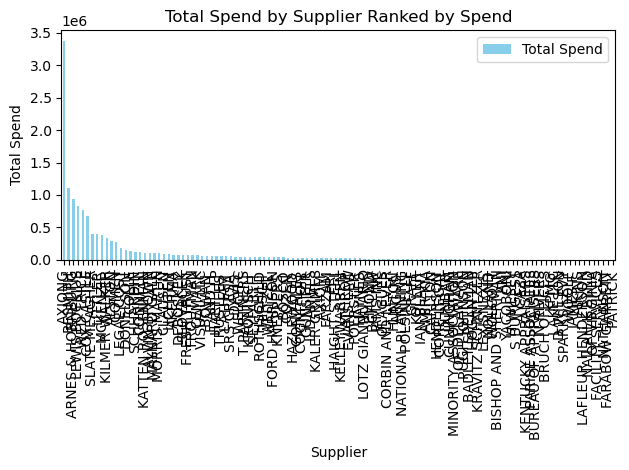

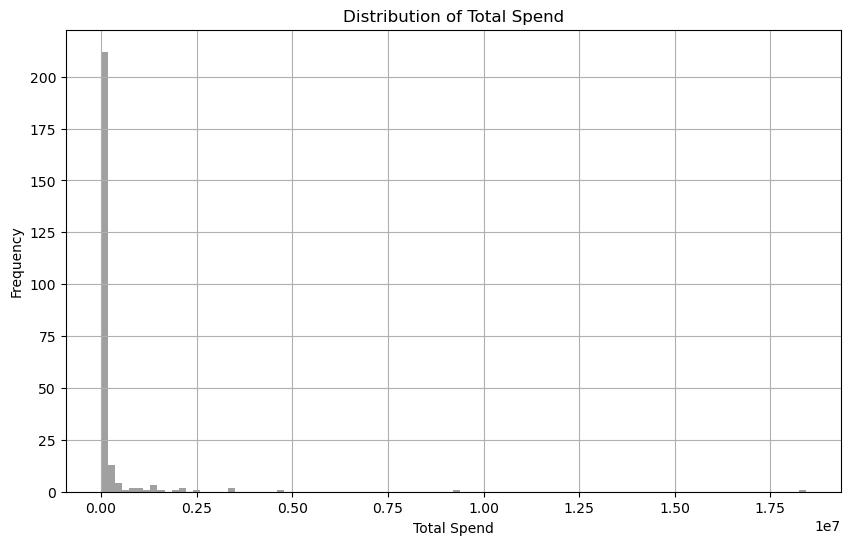

Plots for Office Supplies category


<Figure size 1200x800 with 0 Axes>

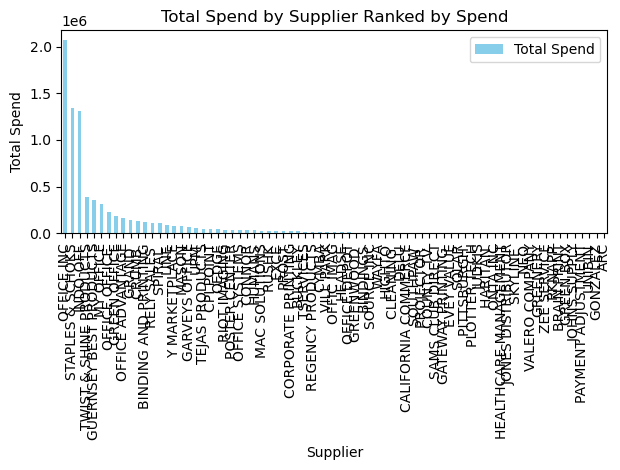

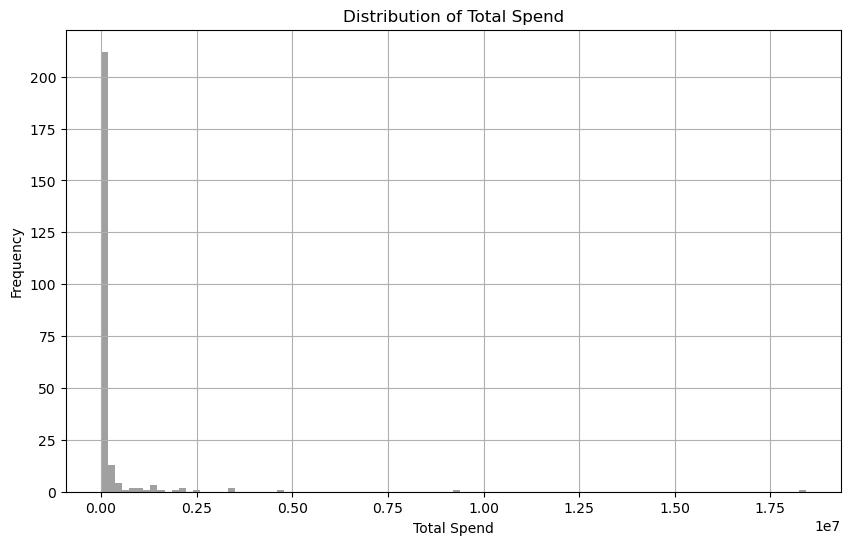

Plots for Contingent Labor category


<Figure size 1200x800 with 0 Axes>

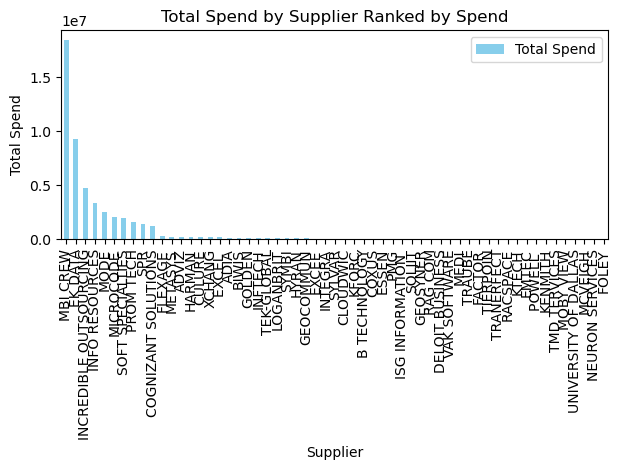

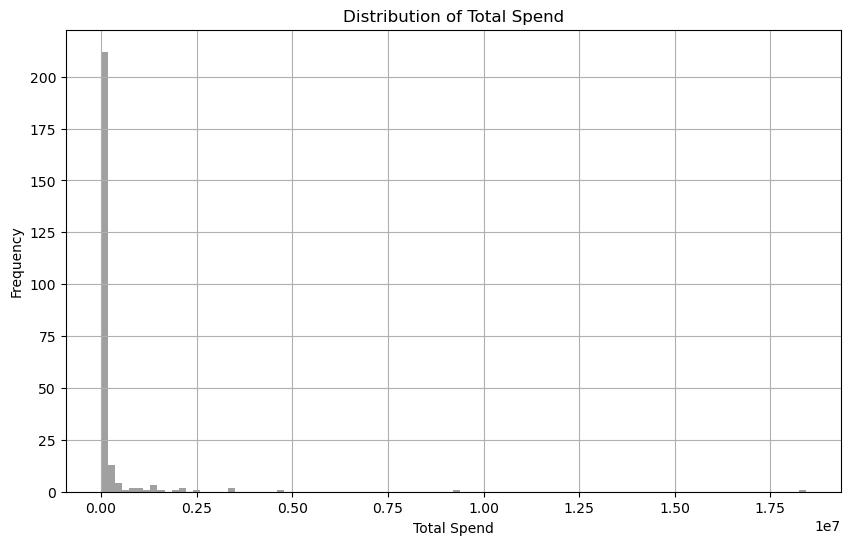

In [88]:
def plot_bars(df):

    # Rank and sort the suppliers based on 'Total Spend'
    sorted_data = df.sort_values('Total Spend', ascending=False)

    # Plotting the bar chart
    plt.figure(figsize=(12, 8))  # Increased size for better visibility with many suppliers
    sorted_data.plot(kind='bar', x='Supplier', y='Total Spend', color='skyblue')
    plt.title('Total Spend by Supplier Ranked by Spend')
    plt.xlabel('Supplier')
    plt.ylabel('Total Spend')
    plt.xticks(rotation=90)  # Rotate for better readability of supplier names
    plt.tight_layout()  # Ensure everything fits without overlap

    print("Plots for " + df['Category'].iloc[0] + " category")

    # Show the bar chart
    plt.show()

    # Creating the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data['Total Spend'], bins=100, color='gray', alpha=0.75)
    plt.title('Distribution of Total Spend')
    plt.xlabel('Total Spend')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Show the histogram
    plt.show()

plot_bars(legal)
plot_bars(office_supplies)
plot_bars(labor)

The most notable observation for each category is that a few suppliers account for a significant portion of expenditures, indicating dependency on these suppliers or potential areas for cost-saving negotiations.

#### (2) For each category (Office Supplies, Contingent Labor, Legal Services), create a strategic matrix plot using geographic coverage against total spend and populate data of the suppliers. What do you find from each plot?

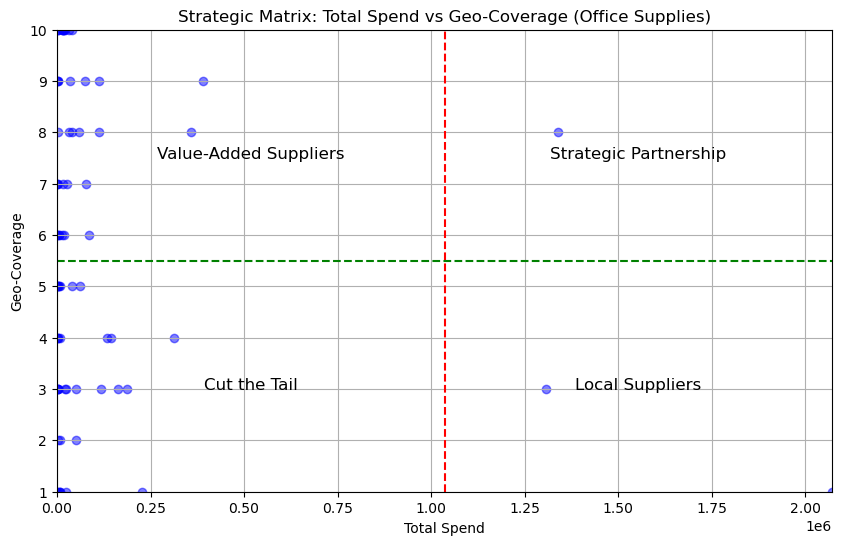

                       Count  Total_Spend_Sum
Quadrant                                     
Cut the Tail              35          1626957
Local Suppliers            2          3378963
Strategic Partnership      1          1340109
Value-Added Suppliers     37          1653971


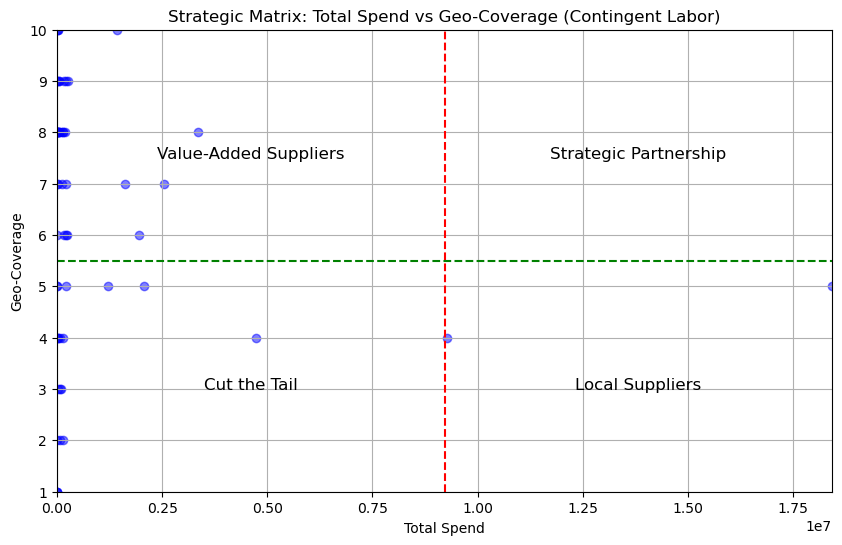

                       Count  Total_Spend_Sum
Quadrant                                     
Cut the Tail              20          8900124
Local Suppliers            2         27707600
Value-Added Suppliers     35         13392276


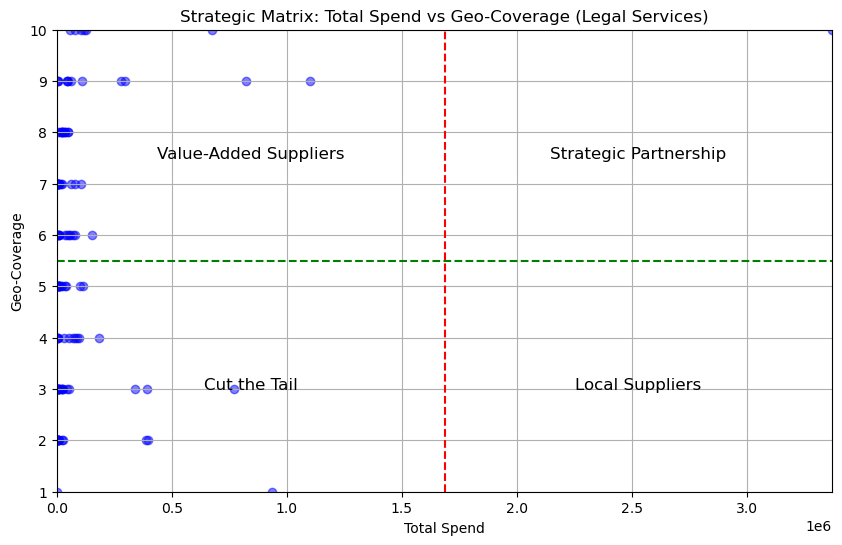

                       Count  Total_Spend_Sum
Quadrant                                     
Cut the Tail              57          4518301
Strategic Partnership      1          3371502
Value-Added Suppliers     58          5110197


In [89]:
def strategic_matrix_plot(df, column, total_spend):

    # Check if the specified columns exist in the DataFrame
    if column not in df.columns or total_spend not in df.columns:
        print("Error: Specified columns do not exist in the DataFrame.")
        return

    # Prepare the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df[total_spend], df[column], color='blue', alpha=0.5)

    # Calculate the half maximum for Total Spend
    max_spend_half = df[total_spend].max() / 2

    # Drawing lines to form quadrants
    plt.axvline(x=max_spend_half, color='red', linestyle='--')  # Vertical line at the median of Total Spend
    plt.axhline(y=5.5, color='green', linestyle='--')  # Horizontal line at the middle of Geo-Coverage range

    # Label quadrants
    plt.text(max_spend_half / 2, 7.5, 'Value-Added Suppliers', fontsize=12, ha='center')
    plt.text(3 * max_spend_half / 2, 7.5, 'Strategic Partnership', fontsize=12, ha='center')
    plt.text(max_spend_half / 2, 3, 'Cut the Tail', fontsize=12, ha='center')
    plt.text(3 * max_spend_half / 2, 3, 'Local Suppliers', fontsize=12, ha='center')

    # Adding labels and titles
    asdf = df['Category'].iloc[0]
    plt.title('Strategic Matrix: Total Spend vs ' + column + " (" + asdf + ")")
    plt.xlabel(total_spend)
    plt.ylabel(column)
    plt.grid(True)

    # Setting axis limits for clarity
    plt.xlim([0, df[total_spend].max()])
    plt.ylim([1, 10])

    # Show plot
    plt.show()

    # Classifying suppliers into quadrants
    conditions = [
        (df[total_spend] <= max_spend_half) & (df[column] > 5.5),
        (df[total_spend] > max_spend_half) & (df[column] > 5.5),
        (df[total_spend] <= max_spend_half) & (df[column] <= 5.5),
        (df[total_spend] > max_spend_half) & (df[column] <= 5.5)
    ]
    choices = ['Value-Added Suppliers', 'Strategic Partnership', 'Cut the Tail', 'Local Suppliers']
    df['Quadrant'] = np.select(conditions, choices, default='Not Categorized')

    # Print counts and sums for each quadrant
    quadrant_summary = df.groupby('Quadrant').agg(
        Count=('Supplier', 'count'),
        Total_Spend_Sum=('Total Spend', 'sum')
    )
    print(quadrant_summary)

strategic_matrix_plot(office_supplies, 'Geo-Coverage', 'Total Spend')
strategic_matrix_plot(labor, 'Geo-Coverage', 'Total Spend')
strategic_matrix_plot(legal, 'Geo-Coverage', 'Total Spend')



By organizing the data in this way it can be determined that 35-50% of suppliers by number and 20-35% by total spend far into the 'Cut the Tail' category. Very few, if any, fall into the 'Strategic Partnership' or 'Local Supplier' category due to relatively low levels of spending per supplier. Thus, we determine that a large number of suppliers could potentially be cut and have their spend redistributed to other suppliers.

#### (3) Other than geographic coverage, what are the other metrics you would take into consideration in terms of supplier rationalization? Calculate the weighted average score for criticality and quality. For each of these metrics, create a strategic matrix plots against total spend by populating the data. What can you tell from the plots? Create a strategic matrix plot populating criticality against quality for each category. What insights do the plots provide? 

In [90]:
# Create functions to apply weights to features of supplier criticality and supplier quality
# The functions will add a new column to the dataframe given as the argument
# Once done, use the matrix plotting function and give the new columns as the argument
# to plot vs Total Spend

def weight_criticality(df):

    df['weighted_criticality'] = df['Available Capacity'] * 0.2 + df['Switching Costs'] * 0.25 + \
        df['Substitution Options'] * 0.15 + df['Savings Opportunity'] * 0.3 + df['Integrated Solutions'] * 0.1

def weight_quality(df):
    df['weighted_quality'] = df['Leadership'] * 0.1 + df['Innovation'] * 0.35 + \
        df['Technology'] * 0.2 + df['Compilance'] * 0.1 + df['Customer Services'] * 0.25



## Part 2: Strategy Recommendation and Justification

#### (4) How do different characteristics of the three categories (Office Supplies, Contingent Labor, and Legal Services) influence your viewpoint on supplier rationalization? Compare the categories and discuss the differences. 

#### (5) What is the number of suppliers you recommend for each category (1, 2 to 10, or more than 10)? Justify your answer by computing the savings opportunity and/or evaluating the key metrics you use and the pros and cons of your recommendation.